In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_threat_feeds(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        threat_feeds = []
        # Extract threat feeds from HTML elements
        for item in soup.find_all('h1', class_='cy-card__title m-0 cursor-pointer pb-3'):
            feed = item.text.strip()
            threat_feeds.append(feed)
        return threat_feeds
    else:
        print("Failed to retrieve data from the website:", response.status_code)
        return []

# Test the function with the specified URL
url = 'https://cyware.com/cyber-security-news-articles'
threat_feeds = scrape_threat_feeds(url)

# Print the extracted threat feeds
print("Extracted threat feeds:")
for feed in threat_feeds:
    print(feed)

Extracted threat feeds:
“Dirty Stream” Attack Affects Popular Android Apps
More Than Two Dozen Android Vulnerabilities Fixed
North Korean Hackers Spoofing Journalist Emails to Spy on Experts
DeepKeep Secures $10M in Seed Funding to Boost GenAI Protection Endeavors
reNgine: Open-Source Automated Reconnaissance Framework for Web Applications
Cybersecurity Consultant Arrested After Allegedly Extorting IT Firm
REvil Ransomware Affiliate Sentenced to Over 13 Years in Prison
AI-Driven Phishing Attacks Deceive Even the Most Aware Users
Investigation Uncovers Substantial Spyware Exports to Indonesia
US Charges 16 Over ‘Depraved’ Grandparent Scams


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_excel('Test.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel dataset

# Fill missing values in 'description' column with empty strings
df['Article'] = df['Article'].fillna('')

# Drop rows with NaN values in 'industry' column
df = df.dropna(subset=['industry'])

# Prepare data
X = df['Article']  # Threat feed description as feature
y = df['industry']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Predict industry labels for testing data
y_pred = model.predict(X_test_vectorized)

# Evaluate model performance
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

   Financial       0.83      0.71      0.77        14
       Other       0.85      0.92      0.88        24

    accuracy                           0.84        38
   macro avg       0.84      0.82      0.82        38
weighted avg       0.84      0.84      0.84        38



<Figure size 1000x600 with 0 Axes>

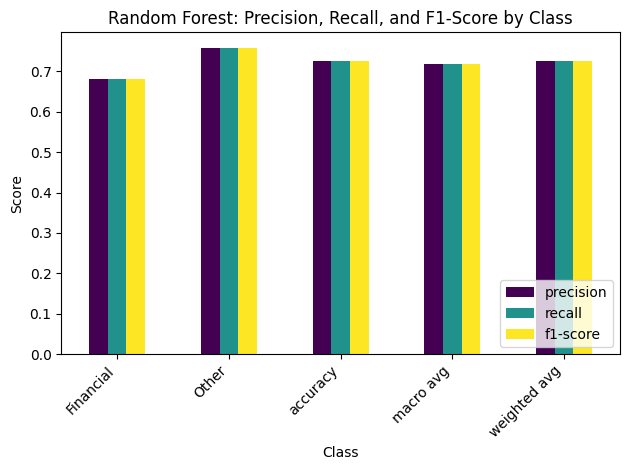

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_excel('Test.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel dataset

# Fill missing values in 'description' column with empty strings
df['Article'] = df['Article'].fillna('')

# Drop rows with NaN values in 'industry' column
df = df.dropna(subset=['industry'])

# Prepare data
X = df['Article']  # Threat feed description as feature
y = df['industry']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
rf_model.fit(X_train_vectorized, y_train)

# Predict industry labels for testing data
y_pred_rf = rf_model.predict(X_test_vectorized)

# Evaluate model performance
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
report_rf_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis')
plt.title('Random Forest: Precision, Recall, and F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_excel('Test.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel dataset

# Fill missing values in 'description' column with empty strings
df['Article'] = df['Article'].fillna('')

# Drop rows with NaN values in 'industry' column
df = df.dropna(subset=['industry'])

# Prepare data
X = df['Article']  # Threat feed description as feature
y = df['industry']  # Target variable

# Encode class labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
xgb_model.fit(X_train_vectorized, y_train)

# Predict industry labels for testing data
y_pred_xgb = xgb_model.predict(X_test_vectorized)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate model performance
report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Classification Report:")
print(report_xgb)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       322
           1       0.75      0.75      0.75       427

    accuracy                           0.72       749
   macro avg       0.71      0.71      0.71       749
weighted avg       0.72      0.72      0.72       749



In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import torch

# Load your dataset
df = pd.read_excel('NLP.xlsx')  # Replace 'NLP.xlsx' with the path to your Excel dataset

# Drop unnecessary columns
df.drop(df.columns[df.columns.str.startswith('Unnamed:')], axis=1, inplace=True)

# Drop rows with missing values in description column
df.dropna(subset=['description'], inplace=True)

# Convert non-string values to strings in the 'description' column
df['description'] = df['description'].astype(str)

# Define input text and labels
X = df['description']
y = df[['inclusion_criteria', 'incident_type', 'receiver_name', 'receiver_country', 'receiver_category', 'initiator_name', 'initiator_category', 'attributing_actor', 'attributed_initiator', 'zero_days', 'MITRE_initial_access', 'MITRE_impact', 'user_interaction', 'has_disruption', 'data_theft', 'disruption', 'hijacking', 'target_multiplier', 'impact_indicator']]

# Print original length of y
print("Original length of y:", len(y))

# Convert labels to the appropriate data type
for column in y.columns:
    y[column] = pd.to_numeric(y[column], errors='coerce')

# Drop rows with missing values in labels
y.dropna(inplace=True)

# Print final length of y after dropping missing values
print("Final length of y after preprocessing:", len(y))

# Reset indices to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Print lengths of X and y after reset indices
print("Length of X:", len(X))
print("Length of y:", len(y))

# Ensure the number of samples in X matches the number of samples in y
if len(X) != len(y):
    raise ValueError("Number of samples in input text and labels do not match!")

# Convert labels to multi-hot encoding
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(y.values)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Tokenize input text
inputs = tokenizer(X.tolist(), padding=True, truncation=True, return_tensors="pt")

# Convert labels to tensors
labels = torch.tensor(labels, dtype=torch.float32)

# Split data into train and test sets
train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Define training arguments
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    num_train_epochs=3,
    logging_dir='./logs',
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_inputs,
    eval_dataset=test_inputs,
)

# Train the model
trainer.train()

# Evaluate the model
predictions = trainer.predict(test_inputs)

# Print classification report
print(classification_report(test_labels, predictions.predictions > 0.5, target_names=mlb.classes_))


Original length of y: 2898
Final length of y after preprocessing: 0
Length of X: 2898
Length of y: 0


<ipython-input-40-ab39ab37bbbe>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = pd.to_numeric(y[column], errors='coerce')
<ipython-input-40-ab39ab37bbbe>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


ValueError: Number of samples in input text and labels do not match!

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load your dataset
df = pd.read_excel('NLP.xlsx')  # Replace 'NLP.xlsx' with the path to your Excel dataset

# Drop unnecessary columns
df.drop(df.columns[df.columns.str.startswith('Unnamed:')], axis=1, inplace=True)

# Drop rows with missing values in description column
df.dropna(subset=['description'], inplace=True)

# Convert non-string values to strings in the 'description' column
df['description'] = df['description'].astype(str)

# Define input text and labels
X = df['description']
y = df[['inclusion_criteria', 'incident_type', 'receiver_name', 'receiver_country']]

# Convert non-numeric values to strings
for column in y.columns:
    y[column] = y[column].astype(str)

# Convert labels to multi-hot encoding
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(y.values)

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input text
inputs = tokenizer(X.tolist(), padding=True, truncation=True, return_tensors="pt")

# Ensure inputs and labels have the same number of samples
assert inputs.input_ids.shape[0] == labels.shape[0], "Number of samples in inputs and labels do not match!"

# Split data into train and test sets
train_indices, test_indices = train_test_split(range(len(X)), test_size=0.2, random_state=42)
train_inputs = {key: value[train_indices] for key, value in inputs.items()}
train_labels = labels[train_indices]
test_inputs = {key: value[test_indices] for key, value in inputs.items()}
test_labels = labels[test_indices]

# Create PyTorch DataLoader
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], torch.tensor(train_labels, dtype=torch.float))
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], torch.tensor(test_labels, dtype=torch.float))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(mlb.classes_))

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss()

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(3):  # Adjust number of epochs as needed
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids, attention_mask, targets = batch
        input_ids, attention_mask, targets = input_ids.to(device), attention_mask.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
        loss = criterion(outputs.logits, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Evaluation
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, targets = batch
        input_ids, attention_mask, targets = input_ids.to(device), attention_mask.to(device), targets.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions.extend(torch.sigmoid(outputs.logits).cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

predictions = torch.tensor(predictions) > 0.5

# Print classification report
print(classification_report(true_labels, predictions, target_names=mlb.classes_))


<ipython-input-5-1be4a9026928>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype(str)
<ipython-input-5-1be4a9026928>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype(str)
<ipython-input-5-1be4a9026928>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.23668786415766024
Epoch 2, Loss: 0.04254840533409653
Epoch 3, Loss: 0.022765481870236068


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

# Load your dataset
df = pd.read_excel('NLP.xlsx')  # Replace 'NLP.xlsx' with the path to your Excel dataset

# Drop unnecessary columns
df.drop(df.columns[df.columns.str.startswith('Unnamed:')], axis=1, inplace=True)

# Drop rows with missing values in description column
df.dropna(subset=['description'], inplace=True)

# Convert non-string values to strings in the 'description' column
df['description'] = df['description'].astype(str)

# Define input text and labels
X = df['description']
y = df[['inclusion_criteria', 'incident_type', 'receiver_name', 'receiver_country']]

# Convert non-numeric values to strings
for column in y.columns:
    y[column] = y[column].astype(str)

# Convert labels to multi-hot encoding
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(y.values)

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input text
inputs = tokenizer(X.tolist(), padding=True, truncation=True, return_tensors="pt")

# Ensure inputs and labels have the same number of samples
assert inputs.input_ids.shape[0] == labels.shape[0], "Number of samples in inputs and labels do not match!"

# Sample a subset of the dataset
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert non-numeric values in labels to numeric
label_encoder = LabelEncoder()
labels_numeric = label_encoder.fit_transform(y_sampled.values)

# Split data into train and test sets
train_indices, test_indices = train_test_split(range(len(X)), test_size=0.2, random_state=42)

# Split inputs and labels based on indices
train_inputs = {key: value[train_indices] for key, value in inputs.items()}
train_labels = labels[train_indices]
test_inputs = {key: value[test_indices] for key, value in inputs.items()}
test_labels = labels[test_indices]

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y.columns))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenize input text
inputs = tokenizer(X_sampled.tolist(), padding=True, truncation=True, return_tensors="pt")
labels = y_sampled.values

# Convert labels to numpy array
labels_array = y_sampled.values

# Create PyTorch DataLoader
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], torch.tensor(labels, dtype=torch.float))
sampler = RandomSampler(dataset)
batch_size = 4  # Adjust batch_size as needed
dataloader = DataLoader(dataset, sampler=sampler, batch_size=batch_size)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss()

# Training loop
model.train()
for epoch in range(3):  # Adjust number of epochs as needed
    for step, batch in enumerate(dataloader):
        input_ids, attention_mask, targets = batch
        input_ids, attention_mask, targets = input_ids.to(device), attention_mask.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
        loss = criterion(outputs.logits, targets)
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
            print(f"Epoch {epoch+1}, Step {step}, Loss: {loss.item()}")

# Evaluation
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, targets = batch
        input_ids, attention_mask, targets = input_ids.to(device), attention_mask.to(device), targets.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions.extend(torch.sigmoid(outputs.logits).cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

predictions = torch.tensor(predictions) > 0.5

# Print classification report
print(classification_report(true_labels, predictions, target_names=mlb.classes_))


<ipython-input-4-dd7a8ccdf2d4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype(str)
<ipython-input-4-dd7a8ccdf2d4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype(str)
<ipython-input-4-dd7a8ccdf2d4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

ValueError: y should be a 1d array, got an array of shape (2318, 4) instead.

In [ ]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.2 MB/s eta 0:00:00
